<a href="https://colab.research.google.com/github/archicos/8SlidingPuzzle/blob/main/correlation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [32]:
!pip install ace_tools

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

**2. Import Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
file_path = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'

df = pd.read_csv(file_path, encoding="latin-1", sep=";")
df.head()

,Timestamp,Email,Nama,NIM,Angkatan,Happiness_Q1,Happiness_Q2,Happiness_Q3,Happiness_Q4,Happiness_Q5,...,TaskSuccess_Q4,TaskSuccess_Q5,Qualitative_Q1,Qualitative_Q2,Qualitative_Q3,Qualitative_Q4,Feedback,Error,Suggestion,File
0,3/26/2025 11:44:39,gloriapanjaitan3012@gmail.com,Gloria Panjaitan,11S23030,2023,5,4,4,5,5,...,4,5,Leaderboard,Tidak,Tidak,Lebih seru dan menarik,Sudah di upload,Sudah di upload,Menambahkan animasi sederhana,https://drive.google.com/open?id=1UWwnVxfv8Sn8...
1,3/26/2025 11:45:03,andresaragih932@gmail.com,Andre Christian Saragih,11S23026,2023,5,5,5,5,5,...,5,5,Point\n\nKarena pointnya dapat ditukarkan dan ...,Tidak,Tidak,Gamifikasi meningkatkan kualitas belajar saya,Sangat bagus,Sudah di uppload,Sudah baik,https://drive.google.com/open?id=1yJpmGPuwsZ1A...
2,3/26/2025 11:45:24,firenoobgaming@gmail.com,Josua,11S23033,2023,3,3,5,4,3,...,3,3,Progress bar,Tidak,Tidak ada sejauh ini,Sama aja,Di foto,Banyak,Ada di foto,https://drive.google.com/open?id=1-51jAdyASsbI...
3,3/26/2025 11:46:16,josuaasrgh@gmail.com,Josua Saragih,11S23028,2023,5,5,4,4,4,...,3,4,Leaderboard,tidak,tidak ada,"lebih seru, dan jadi berpacu untuk belajar",aplikasi nya bagus untuk memacu mahasiswa untu...,1. tombol back tidak berfungsi dengan baik\n2....,UI nya lebih menarik lagi,NaN
4,3/26/2025 11:47:18,christopasaribu90@gmail.com,Christo Pasaribu,11S23005,2023,5,5,5,4,4,...,4,4,"Point, karena ingin menukar nya dengan hadiah",Tidak,Tidak,Sebelum ada fitur gamifikasi tidak ada niatan ...,NaN,Jumlah soal yang benar tidak sesuai dengan jum...,Menurut saya sudah pass mantapp\n,NaN


**3. Data Pre-Processing and Visualization**

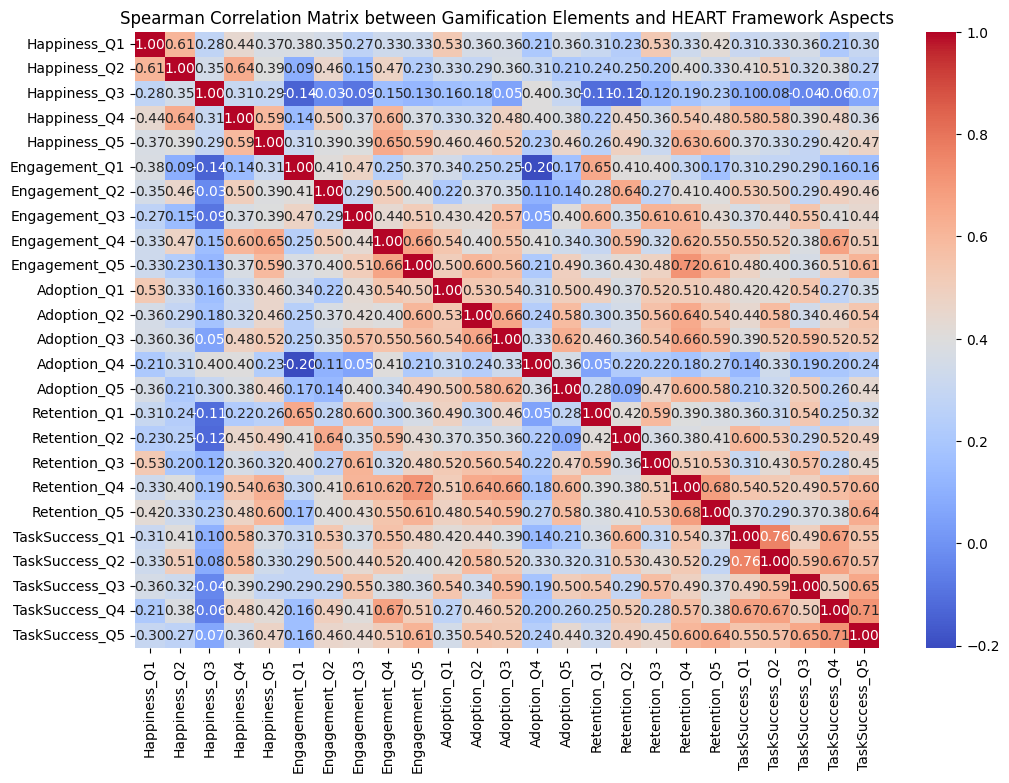

In [28]:
# Elemen gamifikasi (Q1-Q5) dan aspek HEART (Happiness, Engagement, Adoption, Retention, Task Success)
gamification_columns = ['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5',
                        'Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5',
                        'Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5',
                        'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5',
                        'TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']

# Hanya mengambil kolom yang relevan untuk uji korelasi
df_korelasi = df[gamification_columns]

# Melakukan uji korelasi Spearman antara setiap elemen gamifikasi dan aspek HEART
corr_matrix, _ = spearmanr(df_korelasi, axis=0)

# Visualisasi hasil korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=gamification_columns, yticklabels=gamification_columns)
plt.title('Spearman Correlation Matrix between Gamification Elements and HEART Framework Aspects')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

**4. Correlation Test using Spearman**

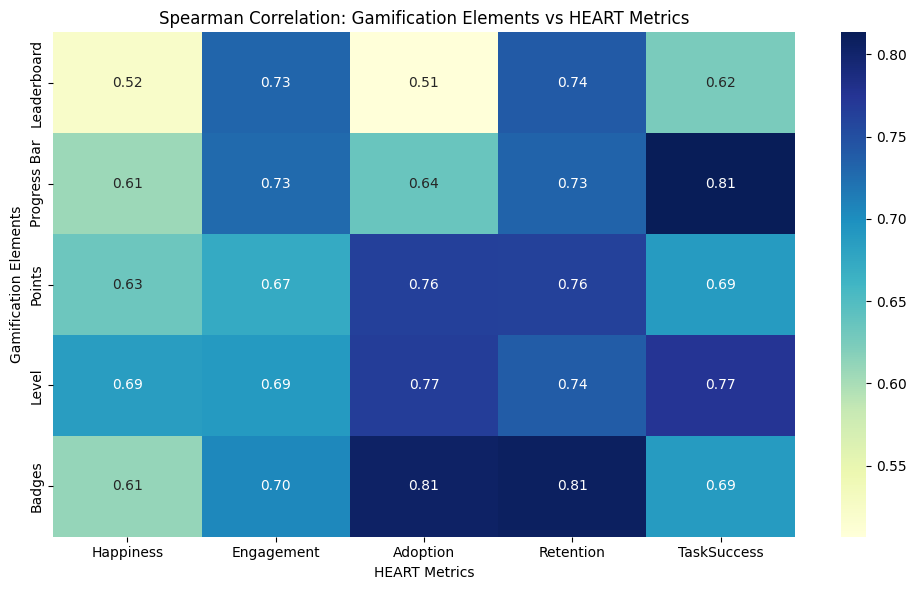

,Happiness,Engagement,Adoption,Retention,TaskSuccess
Leaderboard,0.5231,0.7308,0.5068,0.7402,0.6247
Progress Bar,0.6071,0.7272,0.6351,0.7321,0.8134
Points,0.6336,0.6728,0.7635,0.7626,0.6888
Level,0.6854,0.6894,0.7659,0.7389,0.7743
Badges,0.6104,0.7049,0.8050,0.8076,0.6880


In [35]:
# Definisikan kolom untuk setiap aspek HEART
heart_columns = {
    'Happiness': ['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5'],
    'Engagement': ['Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5'],
    'Adoption': ['Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5'],
    'Retention': ['Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5'],
    'TaskSuccess': ['TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']
}

gamification_elements = {
    'Leaderboard': ['Happiness_Q1', 'Engagement_Q1', 'Adoption_Q1', 'Retention_Q1', 'TaskSuccess_Q1'],
    'Progress Bar': ['Happiness_Q2', 'Engagement_Q2', 'Adoption_Q2', 'Retention_Q2', 'TaskSuccess_Q2'],
    'Points': ['Happiness_Q3', 'Engagement_Q3', 'Adoption_Q3', 'Retention_Q3', 'TaskSuccess_Q3'],
    'Level': ['Happiness_Q4', 'Engagement_Q4', 'Adoption_Q4', 'Retention_Q4', 'TaskSuccess_Q4'],
    'Badges': ['Happiness_Q5', 'Engagement_Q5', 'Adoption_Q5', 'Retention_Q5', 'TaskSuccess_Q5']
}

# Hitung skor rata-rata untuk setiap aspek HEART
heart_scores = {aspect: df[cols].mean(axis=1) for aspect, cols in heart_columns.items()}

# Hitung skor rata-rata untuk setiap elemen gamifikasi
element_scores = {element: df[cols].mean(axis=1) for element, cols in gamification_elements.items()}

# Hitung korelasi Spearman antara elemen gamifikasi dan aspek HEART
correlation_matrix = pd.DataFrame(index=gamification_elements.keys(), columns=heart_columns.keys())

for element_name, element_score in element_scores.items():
    for aspect_name, aspect_score in heart_scores.items():
        correlation, _ = spearmanr(element_score, aspect_score)
        correlation_matrix.loc[element_name, aspect_name] = round(correlation, 4)

# Ubah ke float untuk plotting
correlation_matrix = correlation_matrix.astype(float)

# Visualisasi Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Spearman Correlation: Gamification Elements vs HEART Metrics")
plt.xlabel("HEART Metrics")
plt.ylabel("Gamification Elements")
plt.tight_layout()
plt.show()



correlation_matrix

**5. Visualization using Scatter Plot**

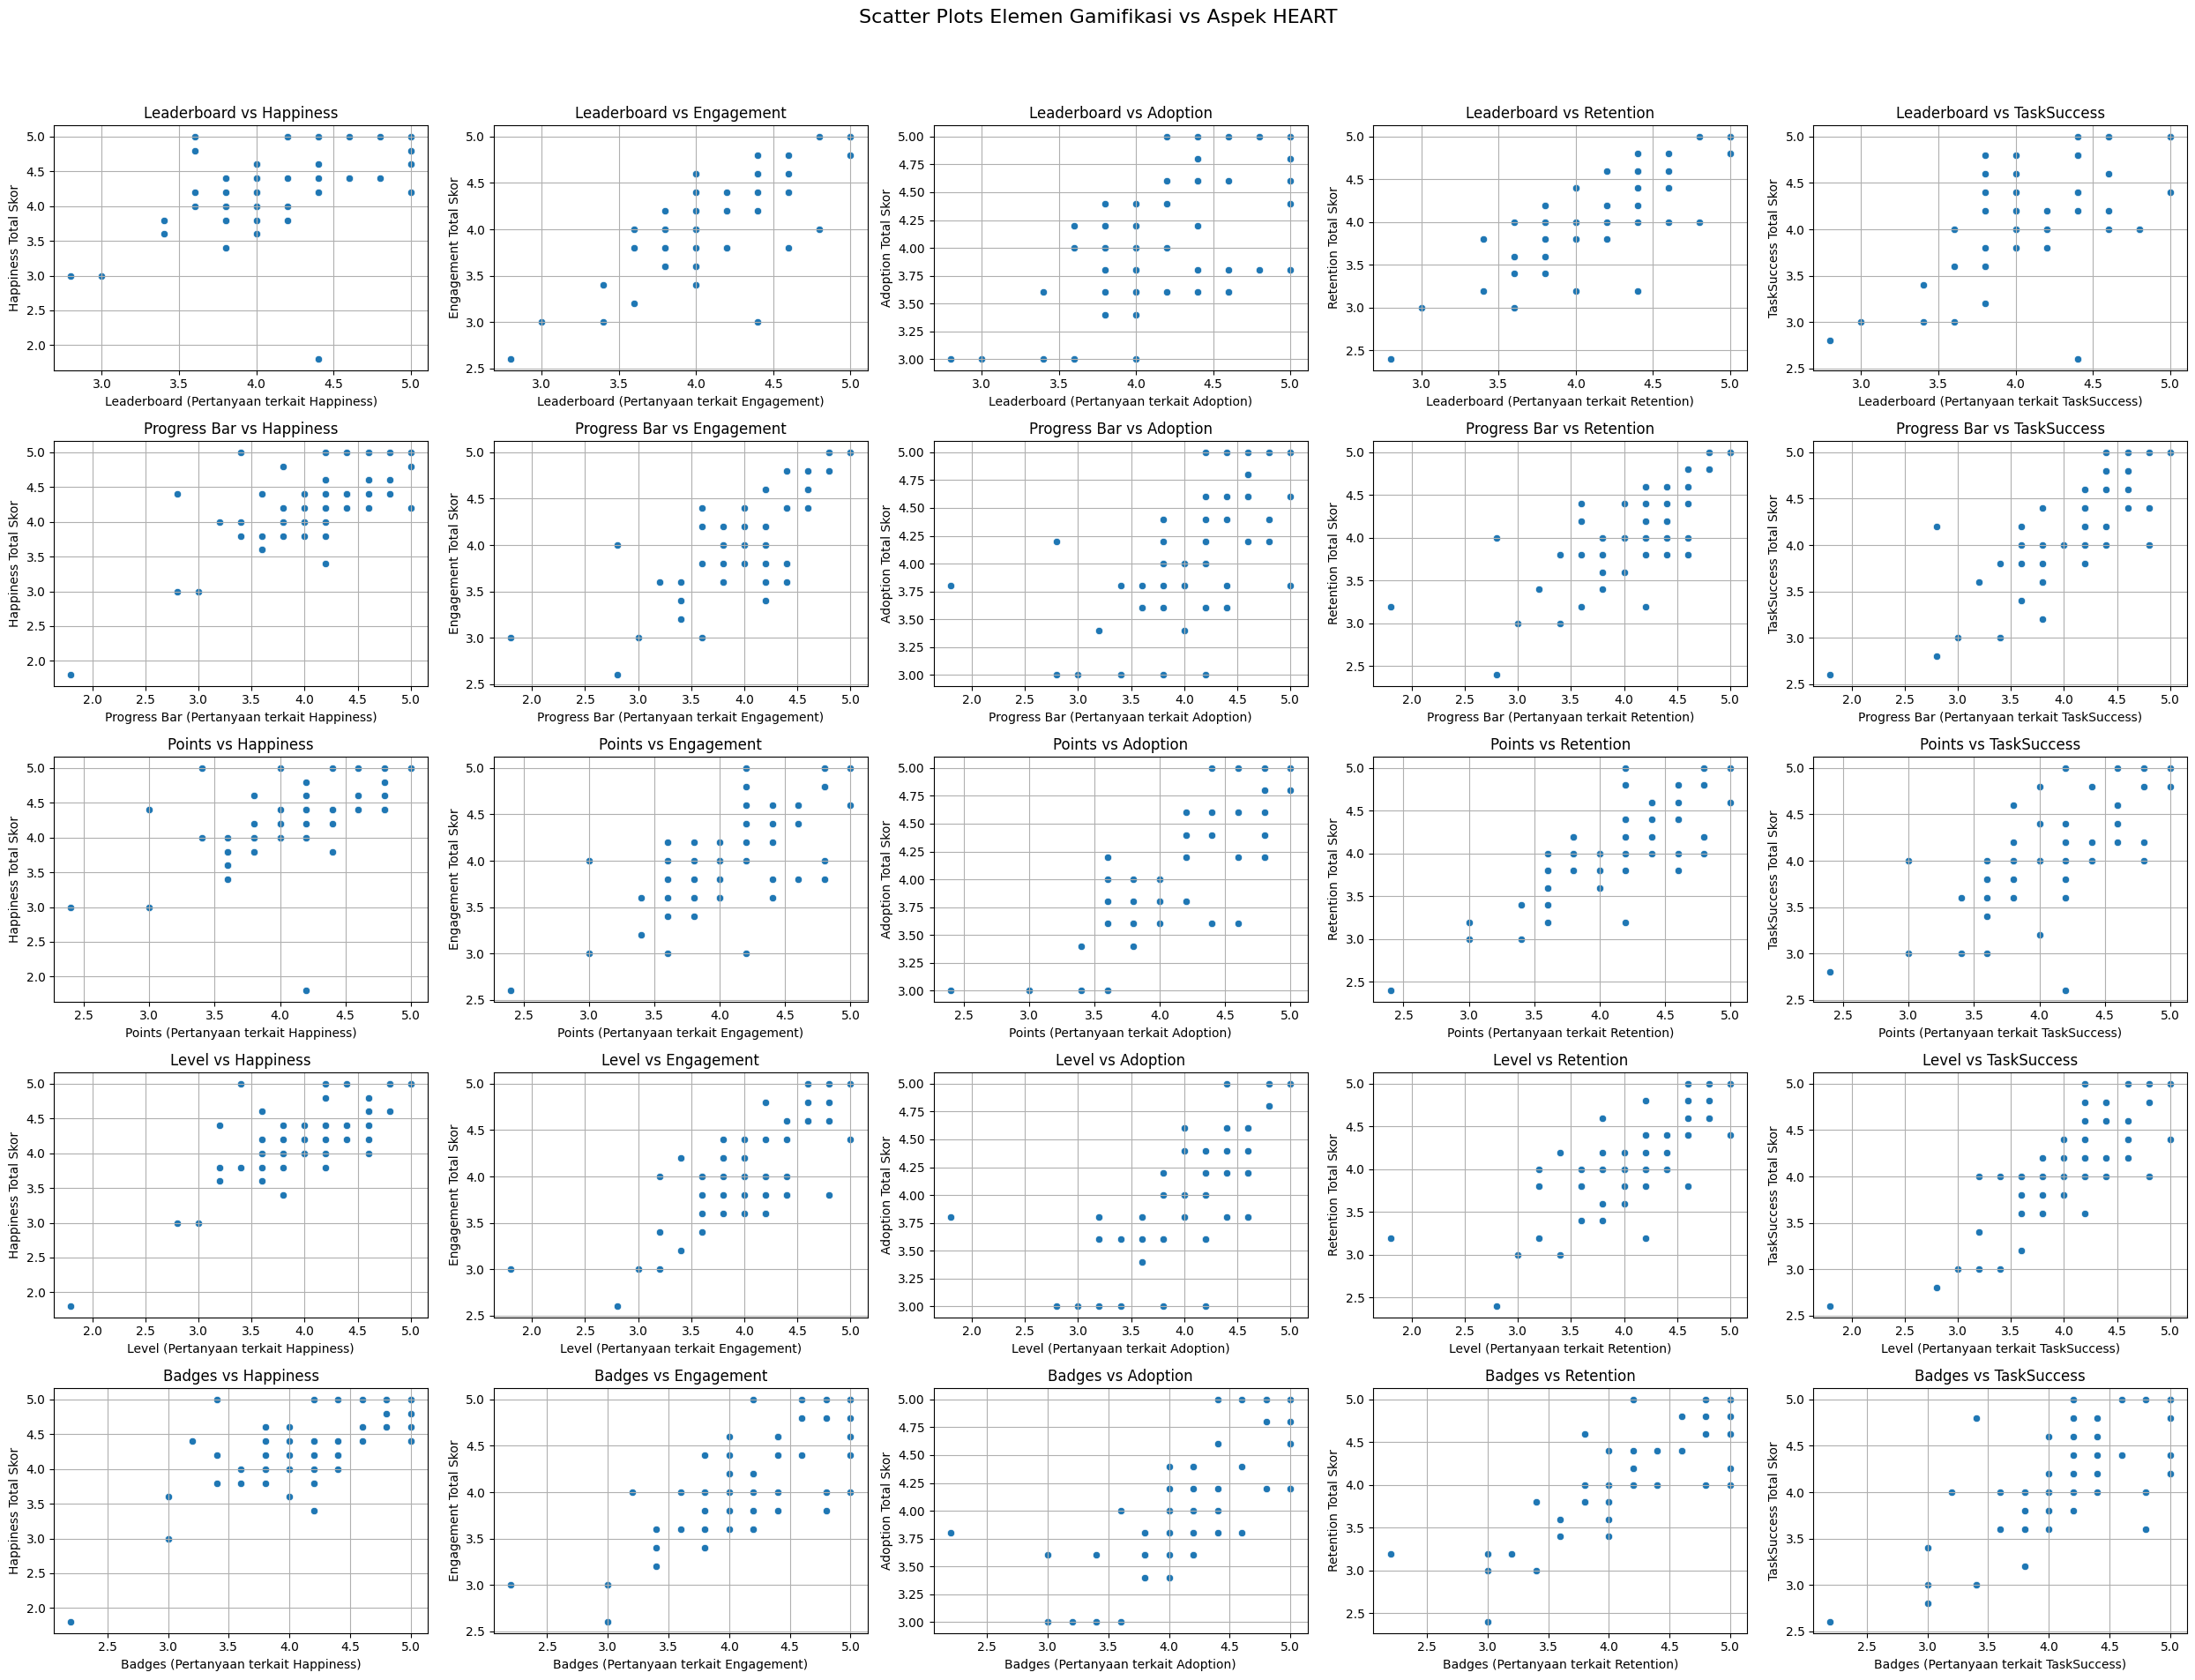

In [38]:
# Definisikan aspek HEART dan elemen gamifikasi
aspects = ["Happiness", "Engagement", "Adoption", "Retention", "TaskSuccess"]
num_aspects = len(aspects)
num_elements = len(gamification_elements)

# Menyusun DataFrame untuk scatter plot
fig, axes = plt.subplots(num_elements, num_aspects, figsize=(5 * num_aspects, 4 * num_elements))
fig.suptitle('Scatter Plots Elemen Gamifikasi vs Aspek HEART', fontsize=16)

# Plot untuk setiap elemen gamifikasi dan setiap aspek HEART
for row_idx, (element_name, element_score) in enumerate(element_scores.items()):
    for col_idx, aspect in enumerate(aspects):
        x = element_score  # skor elemen gamifikasi untuk aspek tersebut
        y = heart_scores[aspect]  # skor rata-rata aspek HEART

        ax = axes[row_idx, col_idx]  # Pilih subplot yang sesuai
        sns.scatterplot(x=x, y=y, ax=ax)
        ax.set_title(f'{element_name} vs {aspect}')
        ax.set_xlabel(f'{element_name} (Pertanyaan terkait {aspect})')
        ax.set_ylabel(f'{aspect} Total Skor')
        ax.grid(True)

# Menyesuaikan layout agar tidak tumpang tindih dengan judul super
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()